# Linear Regression with One Variable


In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Hyper parameters
learning_rate = 1
training_epochs = 1000
display_step = 50

## Dataset

Our dataset a wire resistance table from a chip for 20nm process node. 
It is a 2D array of wire-length, wire-width, temperature and wire-resistance.
We'll use wire length and wire resistance as our dataset for linear regression example.


|Wire-length | Wire-width  | Temperature | Resistance
|------------|-------------|-------------|-------------
|(meters)    | (meters)    | (degree C)  | (Ohm)
|3.806e-06   | 1.088e-07   | 79.0494     | 52.897 
|4.307e-06   | 7.517e-08   | 56.2845     | 83.904 
|4.158e-06   | 1.135e-07   | 27.0643     | 52.517 
|5.416e-06   | 8.939e-08   | 42.0784     | 85.435 
|6.274e-06   | 9.090e-08   | 55.5829     | 110.85 
|8.215e-06   | 1.199e-07   | 97.4032     | 119.45
|6.437e-06   | 6.653e-08   | 75.0783     | 148.11 
|2.823e-06   | 1.028e-07   | 2.48765     | 36.138 
|2.015e-06   | 1.293e-07   | 63.5732     | 22.955 
|6.346e-06   | 6.420e-08   | 77.0031     | 145.52 
|5.008e-06   | 1.047e-07   | 105.656     | 79.024 



In [3]:
#Load dataset
datafile = os.path.join('..','data','res.tbl.gz')
dataset = np.loadtxt(datafile, dtype=np.float32, ndmin=2)
# reduce the dataset for quick experiments
#dataset = dataset[0:100,:]

## Normalization
Since our length values are very small (in microns) and resistance values range from tens to hundreds, it is **very important** normalize the dataset right after loading.

In [4]:
# normalize the dataset between 0 and 1.
data_min = np.min(dataset, axis=0)
data_max = np.max(dataset, axis=0)

def normalize(d, min, max):
    return (d-min)/(max-min)

def denormalize(d, min, max):
    return ((max-min)*d) + min

dataset = normalize(dataset, data_min, data_max)

## Divide the dataset
into training dataset and validation dataset

In [5]:
# training dataset percentage is 80%
def divide_dataset(dataset):
    train_pct = 0.8; 
    # divide dataset into training and validation set
    train_index = int(dataset.shape[0]*train_pct)
    t_X = dataset[:train_index,0]
    t_Y = dataset[:train_index,3]
    v_X = dataset[train_index:,0]
    v_Y = dataset[train_index:,3]
    
    return t_X, t_Y, v_X, v_Y

train_X, train_Y, valid_X, valid_Y = divide_dataset(dataset)
n_samples = train_X.shape[0]

## Declare Graph Variables

Place to declare plave holders and variables for compute graph

In [6]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(0.5, name="weight")
b = tf.Variable(0.0, name="bias")

## Compute Graph
Construct a linear model

In [7]:
predicted = W*X + b

## Cost function and Optimizer

In [8]:
# Mean squared error
cost = tf.reduce_sum((predicted-Y)*(predicted-Y))/(2*n_samples)

# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

## Train the Model

In [9]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [10]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        sess.run(optimizer, feed_dict={X: train_X, Y: train_Y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))
    
    print( "Optimization Finished!" )

    # Find cost on training and validation dataset.
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training   cost (mean sq. error) =",training_cost)
    validation_cost = sess.run(cost, feed_dict={X: valid_X, Y: valid_Y})
    print ("Validation cost (mean sq. error) =",validation_cost, '\n')
    
    # Record the mode before closing the session
    Weight = sess.run(W)
    Bias   = sess.run(b)

Epoch: 0050 cost= 0.001196219 W= 0.359998 b= -0.0410604
Epoch: 0100 cost= 0.001140905 W= 0.313573 b= -0.018446
Epoch: 0150 cost= 0.001128231 W= 0.291351 b= -0.00762109
Epoch: 0200 cost= 0.001125327 W= 0.280714 b= -0.0024396
Epoch: 0250 cost= 0.001124660 W= 0.275623 b= 4.06511e-05
Epoch: 0300 cost= 0.001124509 W= 0.273186 b= 0.00122785
Epoch: 0350 cost= 0.001124474 W= 0.272019 b= 0.00179611
Epoch: 0400 cost= 0.001124466 W= 0.271461 b= 0.0020681
Epoch: 0450 cost= 0.001124465 W= 0.271193 b= 0.00219834
Epoch: 0500 cost= 0.001124464 W= 0.271066 b= 0.00226065
Epoch: 0550 cost= 0.001124464 W= 0.271004 b= 0.00229051
Epoch: 0600 cost= 0.001124463 W= 0.270975 b= 0.00230475
Epoch: 0650 cost= 0.001124464 W= 0.270961 b= 0.00231159
Epoch: 0700 cost= 0.001124464 W= 0.270954 b= 0.00231485
Epoch: 0750 cost= 0.001124463 W= 0.270951 b= 0.00231644
Epoch: 0800 cost= 0.001124463 W= 0.270949 b= 0.00231721
Epoch: 0850 cost= 0.001124463 W= 0.270949 b= 0.00231757
Epoch: 0900 cost= 0.001124463 W= 0.270949 b= 0.0

# Denormalize

In [11]:
# Formulate your trained model as a matrix before denormalization
trained_model = denormalize(train_X * Weight + Bias, data_min[3], data_max[3])

# De normalize dataset
train_X, train_Y, valid_X, valid_Y = divide_dataset(denormalize(dataset, data_min, data_max))

# Plot Model with Dataset

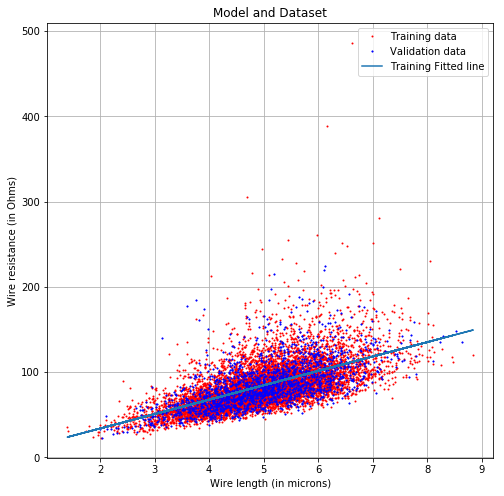

In [12]:
#Graphic display
plt.figure(figsize=(8,8))
plt.title('Model and Dataset')
plt.xlabel('Wire length (in microns)')
plt.ylabel('Wire resistance (in Ohms)')
plt.grid()
plt.plot(train_X*1e6, train_Y, 'ro', label='Training data', marker='o', markersize=1)
plt.plot(valid_X*1e6, valid_Y, 'bo', label='Validation data', marker='D', markersize=1)
plt.plot(train_X*1e6, trained_model, label='Training Fitted line')
plt.legend()
plt.show()

# Predict Resistance Values

In [13]:
def predictResistance(length):
    normalize_length = normalize(length, data_min[0], data_max[0])
    return denormalize(Weight*normalize_length+Bias,data_min[3], data_max[3])

# convert values shows in the table at the top into quads.
res_tbl = [ [3.806e-06, 1.088e-07, 79.0494, 52.897],
            [4.307e-06, 7.517e-08, 56.2845, 83.904],
            [4.158e-06, 1.135e-07, 27.0643, 52.517],
            [5.416e-06, 8.939e-08, 42.0784, 85.435],
            [6.274e-06, 9.090e-08, 55.5829, 110.85],
            [8.215e-06, 1.199e-07, 97.4032, 119.45],
            [6.437e-06, 6.653e-08, 75.0783, 148.11],
            [2.823e-06, 1.028e-07, 2.48765, 36.138],
            [2.015e-06, 1.293e-07, 63.5732, 22.955],
            [6.346e-06, 6.420e-08, 77.0031, 145.52],
            [5.008e-06, 1.047e-07, 105.656, 79.024] ]

for quad in res_tbl:
    predicted_resistance = predictResistance(quad[0])
    print( "Wire length = ", quad[0], ", Predicted Resistance = ", 
          predicted_resistance, ", Actual Resistance =", quad[3],
          ". Diff=", quad[3]-predicted_resistance )

Wire length =  3.806e-06 , Predicted Resistance =  64.359697586 , Actual Resistance = 52.897 . Diff= -11.462697586
Wire length =  4.307e-06 , Predicted Resistance =  72.8229065272 , Actual Resistance = 83.904 . Diff= 11.0810934728
Wire length =  4.158e-06 , Predicted Resistance =  70.3059042672 , Actual Resistance = 52.517 . Diff= -17.7889042672
Wire length =  5.416e-06 , Predicted Resistance =  91.5568360997 , Actual Resistance = 85.435 . Diff= -6.12183609974
Wire length =  6.274e-06 , Predicted Resistance =  106.050714885 , Actual Resistance = 110.85 . Diff= 4.79928511466
Wire length =  8.215e-06 , Predicted Resistance =  138.839314795 , Actual Resistance = 119.45 . Diff= -19.3893147954
Wire length =  6.437e-06 , Predicted Resistance =  108.804214002 , Actual Resistance = 148.11 . Diff= 39.305785998
Wire length =  2.823e-06 , Predicted Resistance =  47.7542397232 , Actual Resistance = 36.138 . Diff= -11.6162397232
Wire length =  2.015e-06 , Predicted Resistance =  34.1049925685 , Act

# Error Distribution

In [14]:
def sampleError(sampleData, goldData):
    sampleData = predictResistance(sampleData)
    error = (goldData-sampleData)/goldData
    return error

training_Error   = sampleError(train_X, train_Y)
validation_Error = sampleError(valid_X, valid_Y)

print('Training   error mean=', np.mean(training_Error),   ' and distribution=', np.std(training_Error))
print('Validation error mean=', np.mean(validation_Error), ' and distribution=', np.std(validation_Error))

Training   error mean= -0.0532259  and distribution= 0.225427
Validation error mean= -0.0508316  and distribution= 0.226922


# Plot Error

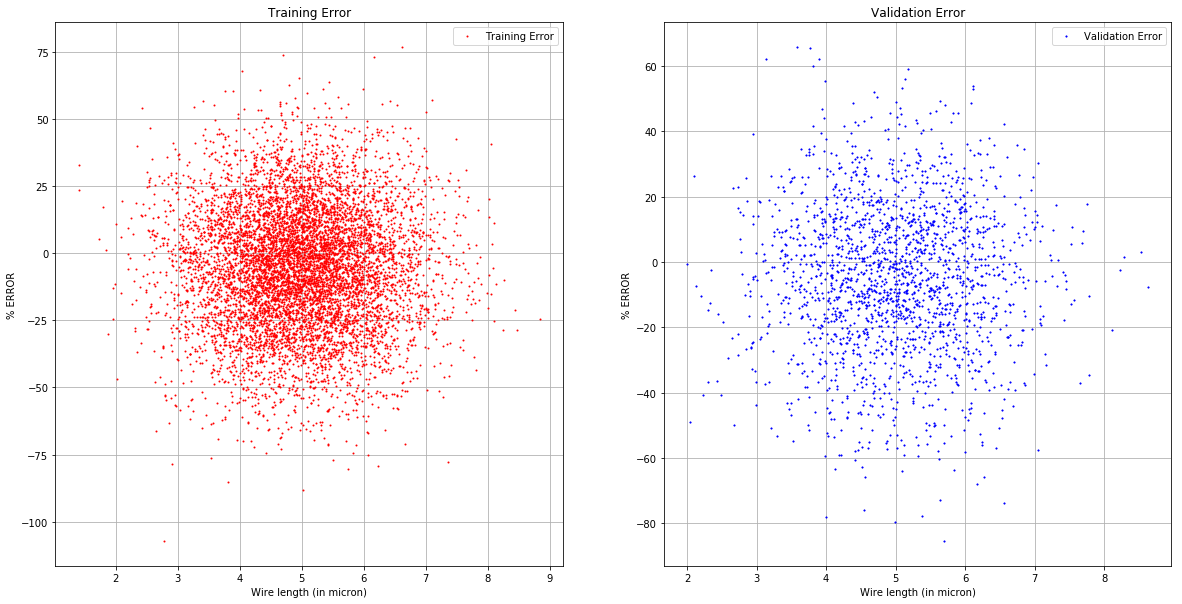

In [15]:
fig = plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.grid()
plt.plot(train_X*1e6, 100*training_Error, 'ro', label='Training Error', marker='o', markersize=1)
plt.title('Training Error')
plt.xlabel('Wire length (in micron)')
plt.ylabel('% ERROR')
plt.legend()


plt.subplot(1, 2, 2)
plt.grid()
plt.plot(valid_X*1e6, 100*validation_Error, 'bo', label='Validation Error', marker='D', markersize=1)
plt.title('Validation Error')
plt.xlabel('Wire length (in micron)')
plt.ylabel('% ERROR')
plt.legend()

plt.show()